# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [4]:
# Optional, if using Google Colab w/ Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [5]:
import cv2

import numpy as np
import scipy as sc
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "/content/drive/My Drive/cs445_projects/proj1/" 

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

In [6]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
%matplotlib inline  
import matplotlib.pyplot as plt

In [40]:
im1_file = datadir + 'cute-dog-headshot.jpg'
im2_file = datadir + 'cat.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

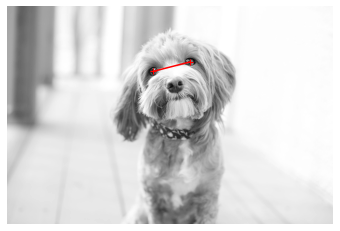

In [41]:
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[447,199], [560,170]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

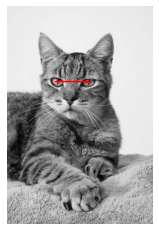

In [42]:
pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[368, 552], [597, 554]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [43]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [44]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

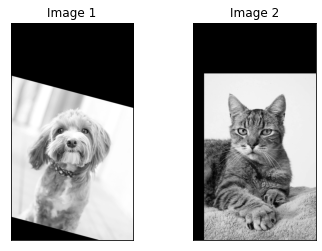

In [45]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [46]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # constant variables to increase sigma values
    CONST_1 = 4
    CONST_2 = 4
    
    # uses gaussian to create affects for both images
    gaussian_affect_cat = utils.gaussian_kernel(sigma_low, CONST_1 * sigma_low)
    gaussian_affect_not_cat = utils.gaussian_kernel(sigma_high, CONST_2 * sigma_high)

    # combines effects and puts as one
    cat_filter = signal.convolve2d(im1,gaussian_affect_cat,boundary='symm', mode='same')
    not_cat_filter = im2-signal.convolve2d(im2,gaussian_affect_not_cat,boundary='symm', mode='same')
    
    # value to return, which is just both filters added together
    rV = cat_filter+not_cat_filter
    
    # plot all figures: before cate, before me, and combined/hybrid photo
    plt.figure()
    plt.imshow(im1,cmap='gray')

    plt.figure()
    plt.imshow(im2,cmap='gray')
    
    plt.figure()
    plt.imshow(rV,cmap='gray')

    return rV


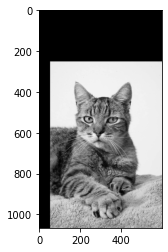

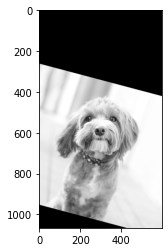

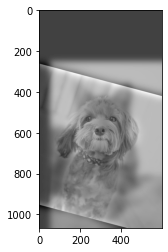

In [48]:
sigma_low = 15 # choose parameters that work for your images
sigma_high = 20

im_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)


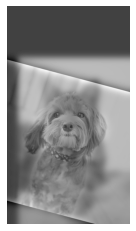

In [49]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

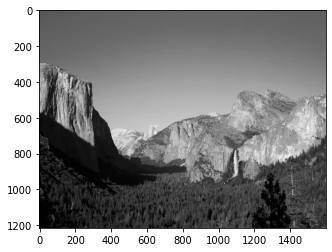

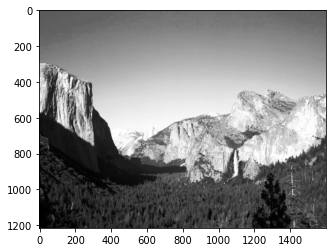

In [71]:
im1_file = datadir + 'yosemite.jpg'
# im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0
im1 = cv2.imread(im1_file,cv2.IMREAD_GRAYSCALE)

# use equalize hist here
# lowers white and light colors while incrases darkness of darker zones within the image
im1_equalize_hist = cv2.equalizeHist(im1)

# Use gaussian filter on top
rV = sc.ndimage.gaussian_filter(im1_equalize_hist, sigma=1)

# plot the before and after of Yosemite image
plt.figure()
plt.imshow(im1,cmap='gray')

plt.figure()
plt.imshow(rV,cmap='gray')


#### Color enhancement 

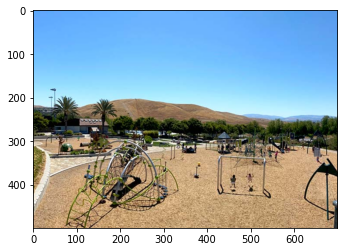

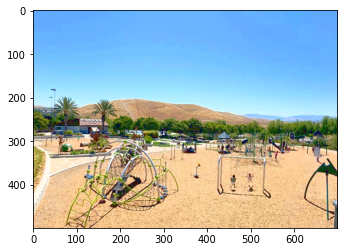

In [72]:
im1_file = datadir + 'park.jpeg'
# im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0
im1 = cv2.imread(im1_file)

# separate into hsv values so we can modify 
h, s, v = cv2.split(cv2.cvtColor(im1,cv2.COLOR_BGR2HSV))

# modify value parameter of hsv so that values above 205 are maxed to 255, and everything else just increases by 50
v[v > 205] = 255
v[v <= 205] += 50

# merge enhacement of image to rV
enhancements = cv2.merge((h, s, v))
rV = cv2.cvtColor(enhancements,cv2.COLOR_HSV2RGB)

# plot before and after
plt.figure()
plt.imshow(cv2.cvtColor(im1,cv2.COLOR_BGR2RGB))

plt.figure()
plt.imshow(rV)

#### Color shift